# Shot overview

In [1]:
%matplotlib notebook
from IPython.core.display import display, HTML
import ipfnpytools.aug_read as aug_read
from ipfnpytools.plot import plot_signals
from ipfnpytools.save_figure import save_figure
import numpy as np
import pandas as pd
from collections import namedtuple
import matplotlib.pyplot as plt
import os
from ipfnpytools.current_flattop import current_flattop

def valid(x):
    return True if x is not None and np.isfinite(x) else False

## Parameters

Change the parameters in the next cell to suit your needs

### Choosing the signals

To add signals you must create an new row following the suggested structure. You must fill-in every parameter:
* **diagnostic:** three-letter shotfile identifier
* **name:** signal identifier within the shotfile
* **scale:** scale factor, e.g., 1e6
* **y_min / y_max:** lower and upper limits for the plot. Choose `None` to enable auto range.
* **box:** specify in which box to draw the signal
* **y_label:** label to put on the yy axis. Supports latex syntax, e.g., D-\\$\alpha\\$ => D-$\alpha$ 
* **line_width:** line width for the signal. Should be small (<1) for signals with fast fluctuations.

To remove signals, simply comment the corresponding line with a `#`. To comment/uncomment multiple lines simultaneously, select the lines and press `Ctrl`+`~`

In [2]:
shot = 37408

# Automatically zoom to the current flattop window
zoom_to_flattop = True

# Otherwise specify the start and end times
t_begins = 2.6 # Begin at time t_begins
t_ends = 3. # End at time t_ends

figure_size = (16, 9) # Figure size in inches (width, height)

show_columns = 2  # Number of columns in which to show the data

signals = pd.DataFrame(
    
columns=
['diagnostic', 'name', 'index', 'scale', 'y_min', 'y_max', 'box', 'y_label', 'line_width'],
    
data=[
# ['LSF', 'CH29'    , 0,       1, None, None, 0,                             "Isat", 0.5],  # Ion saturation current
# ['LSF', 'CH28'    , 2,       1, None, None, 0,                             "Isat", 0.5],  # Ion saturation current
# ['LSF', 'CH25'    , 4,       1, None, None, 0,                             "Isat", 0.5],  # Ion saturation current
# ['LSF', 'CH27'    , 2,       1, None, None, 0,                             "Isat", 0.5],  # Ion saturation current
# ['LSF', 'CH28'    , 0,       1, None, None, 0,                             "Isat", 0.5],  # Ion saturation current
# ['LSF', 'CH30'    , 3,       1, None, None, 0,                             "Isat", 0.5],  # Ion saturation current
# ['LSF', 'CH25'    , 0,       1, None, None, 0,                             "Isat", 0.5],  # Ion saturation current
# ['LSF', 'CH25'    , 2,       1, None, None, 0,                             "Isat", 0.5],  # Ion saturation current
# ['LSF', 'CH22'    , 4,       1, None, None, 0,                             "Isat", 0.5],  # Ion saturation current
# ['LSF', 'CH29'    , 4,       1, None, None, 0,                             "Isat", 0.5],  # Ion saturation current
# ['LSD', 'ne-oa1'  , None,    1, None, None, 8,                              "ne", 1],  # Langmuir probe, density
# ['LSD', 'ne-oa2'  , None,    1, None, None, 8,                              "ne", 1],  # Langmuir probe, density
# ['LSD', 'ne-oa3'  , None,    1, None, None, 8,                              "ne", 1],  # Langmuir probe, density
# ['LSD', 'ne-oa4'  , None,    1, None, None, 8,                              "ne", 1],  # Langmuir probe, density
# ['LSD', 'ne-oa5'  , None,    1, None, None, 8,                              "ne", 1],  # Langmuir probe, density
['MAG', 'Ipa'     , None,  1e6, None, None, 0,                               "MA", 1.5],  # Current
['NIS', 'PNI'     , None,  1e6, None, None, 1,                               "MW", 1.5],  # Neutral beam power
['ECS', 'PECRH'   , None,  1e6, None, None, 1,                               "MW", 1.5],  # ECRH power
# ['TOT', 'PECR_TOT', None,  1e6, None, None, 1,                               "MW", 1.5],  # ECRH power, no loss correction   
['ICH', 'PICRN'   , None,  1e6, None, None, 1,                               "MW", 1.5],  # ICRH power    
['BPD', 'Pradtot' , None,  1e6, None, None, 1,                               "MW",   1],
['TOT', 'P_TOT'   , None,  1e6, None, None, 1,                               "MW",   1],
# ['DCN', 'H-0'     , None, 1e19, None, None, 2, "$\int{n_e}$ ($10^{19}/m^{2})$", 1],    # Horizontal interferometer
# ['DCN', 'H-1'     , None, 1e19, None, None, 2, "$\int{n_e}$ ($10^{19}/m^{2})$", 1],    # Horizontal interferometer
# ['DCN', 'H-2'     , None, 1e19, None, None, 2, "$\int{n_e}$ ($10^{19}/m^{2})$", 1],    # 45 degree upper interferometer
# ['DCN', 'H-4'     , None, 1e19, None, None, 2, "$\int{n_e}$ ($10^{19}/m^{2})$", 1],    # 45 degree upper interferometer
# ['DCN', 'H-5'     , None, 1e19, None, None, 2, "$\int{n_e}$ ($10^{19}/m^{2})$", 1],    # 45 degree upper interferometer
# ['TOT', 'H-0_corr'     , None, 1e19, None, None, 2, "$\overline{n_e}$ ($10^{19}/m^{3})$", 1],    # Horizontal interferometer
['TOT', 'H-1_corr'     , None, 1e19, None, None, 2, "$\overline{n_e}$ ($10^{19}/m^{3})$", 1],    # Horizontal interferometer
['TOT', 'H-2_corr'     , None, 1e19, None, None, 2, "$\overline{n_e}$ ($10^{19}/m^{3})$", 1],    # 45 degree upper interferometer
['TOT', 'H-4_corr'     , None, 1e19, None, None, 2, "$\overline{n_e}$ ($10^{19}/m^{3})$", 1],    # 45 degree upper interferometer
['TOT', 'H-5_corr'     , None, 1e19, None, None, 2, "$\overline{n_e}$ ($10^{19}/m^{3})$", 1],    # 45 degree upper interferometer
['POT', 'ELMa-Han', None,    1, None, None, 3,                 r"$D_\alpha$ (a.u.)", 0.1],
['POT', 'ELMi-Han', None,    1, None, None, 3,                 r"$D_\alpha$ (a.u.)", 0.1],
['MAC', 'Ipolsola', None,  1e3, None, None, 4,                     "$I_{div}$ (kA)", 0.1],  # Outer div. current
['MAC', 'Ipolsoli', None,  1e3, None, None, 4,                     "$I_{div}$ (kA)", 0.1],  # Inner div. current
['UVS', 'D_tot'   , None, 1e21, None, None, 5,                 "Fuel ($10^{21}$/s)", 1],  # Deuterium injection
['UVS', 'N_tot'   , None, 1e21, None, None, 5,                 "Fuel ($10^{21}$/s)", 1],  # N injection
['UVS', 'H_tot'   , None, 1e21, None, None, 5,                 "Fuel ($10^{21}$/s)", 1],  # Hydrogen injection
# ['UVS', 'CFDu13B' , None, 1e21, None, None, 6,                 "Fuel ($10^{21}$/s)", 2],
# ['UVS', 'CFA13A'  , None, 1e21, None, None, 6,                 "Fuel ($10^{21}$/s)", 2],
['FPG', 'delRoben', None,    1, None, None, 6,                                   "", 1],  # Triangularity
['FPG', 'dRXP',     None,    1, None, None, 7,                                   "", 1],  # don't really know
# ['FPG', 'XPfdif',   None,    1, None, None, 7,                                   "", 1],  # X-point flux difference
# ['FPG', 'Zgeo'    , None,    1, None, None, 3,                                   "", 1],  # Triangularity
# ['FPG', 'k'       , None,    1, None, None, 3,                                   "", 1],  # Elongation
# ['FPG', 'q95'     , None,    1, None, None, 3,                                   "", 1],  # Elongation
['TOT', 'Wmhd'    , None,  1e6, None, None, 8,                     "$W_{mhd}$ (MJ)", 1],  # Total magnetic energy stored
['TOT', 'beta_N'    , None,  1, None, None, 8,                     "$W_{mhd}$ (MJ)", 1],
['TTH', 'H/L-facs'    , 7,  1, None, None, 8,                     "$W_{mhd}$ (MJ)", 1],
# ['FPC', 'IpiFP'   , None,  1e6, None, None, 3,                       "$I_{p}$ (MA)", 1],
# ['TOT', 'P_OH'    , None,  1e6, None, None, 5,                             "P (MW)", 1],
['DDS', 'Tdiv'    , None,    1, None, None, 9,                                 "eV", 1.5],
# ['FPG', 'lenH-1',   None,    1, None, None, 10,                                   "m", 1],  # don't really know,
# ['FPG', 'lenH-2',   None,    1, None, None, 10,                                   "m", 1],  # don't really know,
# ['FPG', 'lenH-3',   None,    1, None, None, 10,                                   "m", 1],  # don't really know,
# ['FPG', 'lenH-4',   None,    1, None, None, 10,                                   "m", 1],  # don't really know,
# ['FPG', 'lenH-5',   None,    1, None, None, 10,                                   "m", 1],  # don't really know
])


y_labels = []
for b, l in zip(signals.sort_values(by='box')['box'].tolist(), signals.sort_values(by='box')['y_label'].tolist()):
    try:
        y_labels[b] = l
    except IndexError:
        y_labels.append(l)

## Confirm the signal selection

In [3]:
# Confirm everything is as you want
signals

,diagnostic,name,index,scale,y_min,y_max,box,y_label,line_width
0,MAG,Ipa,NaN,1.000000e+06,None,None,0,MA,1.5
1,NIS,PNI,NaN,1.000000e+06,None,None,1,MW,1.5
2,ECS,PECRH,NaN,1.000000e+06,None,None,1,MW,1.5
3,ICH,PICRN,NaN,1.000000e+06,None,None,1,MW,1.5
4,BPD,Pradtot,NaN,1.000000e+06,None,None,1,MW,1.0
5,TOT,P_TOT,NaN,1.000000e+06,None,None,1,MW,1.0
6,TOT,H-1_corr,NaN,1.000000e+19,None,None,2,$\overline{n_e}$ ($10^{19}/m^{3})$,1.0
7,TOT,H-2_corr,NaN,1.000000e+19,None,None,2,$\overline{n_e}$ ($10^{19}/m^{3})$,1.0
8,TOT,H-4_corr,NaN,1.000000e+19,None,None,2,$\overline{n_e}$ ($10^{19}/m^{3})$,1.0
9,TOT,H-5_corr,NaN,1.000000e+19,None,None,2,$\overline{n_e}$ ($10^{19}/m^{3})$,1.0


## Load the signals from AFS

In [4]:
data = aug_read.many_signals(
    diagnostics=signals['diagnostic'].tolist(),
    names=signals['name'].tolist(),
    shots=shot,
#     channels=[None if np.isnan(_) else int(_) for _ in signals['channel'].tolist()],
)

[t0, t1] = current_flattop(shot)

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/2/2019.03/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2878: UserWarning: not reading signal NIS/PNI due to PyddError: (u'libddww error: Error by DDopen (8.1): shotfile does not exist !', {'function': 'shotfile.open', 'trace': ['_run_module_as_main', '_run_code', '<module>', 'launch_instance', 'IPKernelApp.start', 'ZMQIOLoop.start', 'ZMQIOLoop._run_callback', 'null_wrapper', 'ZMQStream.<lambda>', 'ZMQStream._handle_events', 'ZMQStream._handle_recv', 'ZMQStream._run_callback', 'null_wrapper', 'IPythonKernel.dispatcher', 'IPythonKernel.dispatch_shell', 'IPythonKernel.execute_request', 'IPythonKernel.do_execute', 'ZMQInteractiveShell.run_cell', 'ZMQInteractiveShell.run_cell', 'ZMQInteractiveShell.run_ast_nodes', 'ZMQInteractiveShell.run_code', '<module>', 'many_signals', 'shotfile.__init__', 'shotfile.open'], 'diagnostic': 'NIS', 'edition': 0, 'experiment': 'AUGD', 'pulseNumber': 37408})
  exec(code_obj, self.user_global_ns, self

## Plot signals

<IPython.core.display.Javascript object>


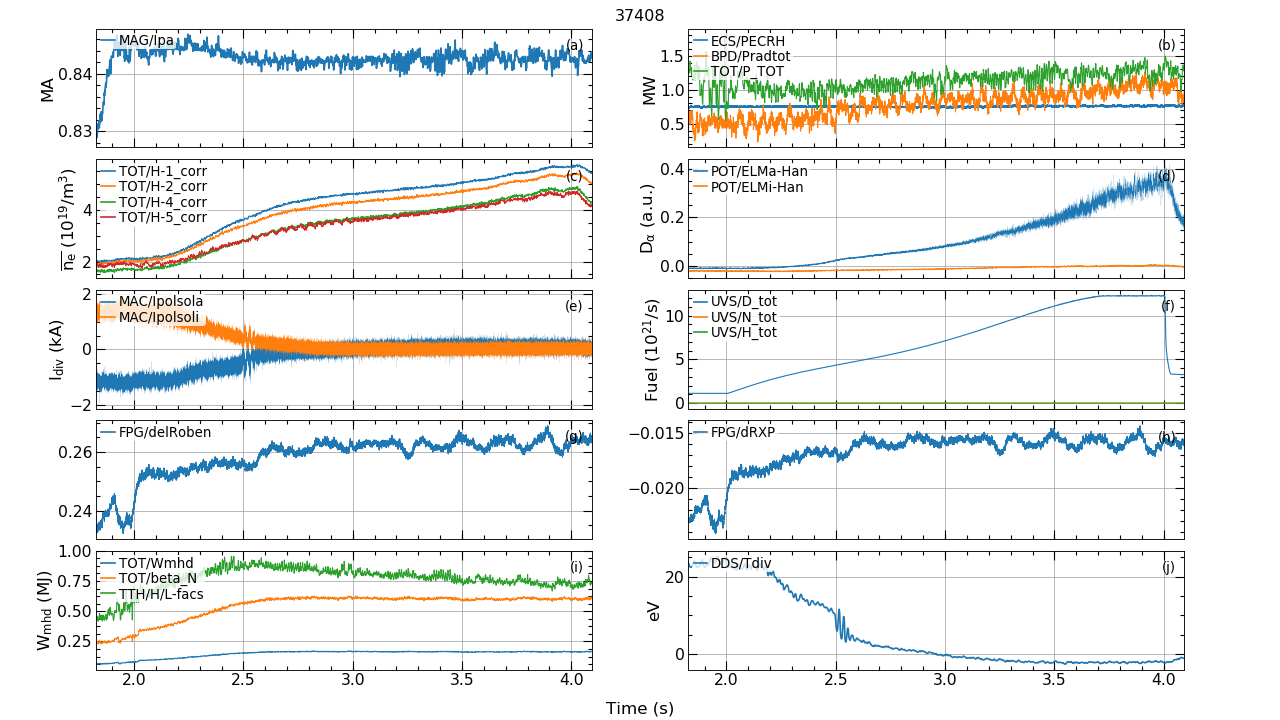

/afs/ipp-garching.mpg.de/u/danielhfc/python/ipfnpytools/ipfnpytools/timing.py:32: UserWarning: not plotting dataset 1 due to TypeError: ("unsupported operand type(s) for *: 'NoneType' and 'int'",)
  result = f(*args, **kw)
/afs/ipp-garching.mpg.de/u/danielhfc/python/ipfnpytools/ipfnpytools/timing.py:32: UserWarning: not plotting dataset 3 due to TypeError: ("unsupported operand type(s) for *: 'NoneType' and 'int'",)
  result = f(*args, **kw)


plot_signals({...}) took 0.399574 seconds


In [5]:
fig, axes, fig_name = plot_signals(
    times = data.times, 
    signals = [s if (i is None or np.isnan(i)) else s[:, int(i)] for (i, s) in zip(signals['index'].tolist(), data.signals)],
    diagnostics = signals['diagnostic'].tolist(),
    names=signals['name'].tolist(), 
    boxes=signals['box'].tolist(), 
    signal_multipliers=[1.0/x for x in signals['scale'].tolist()],
#     y_labels=signals.sort_values(by='box')['y_label'].unique(),
    y_labels=y_labels,
    postfixes="overview", ncols=show_columns,
    order='row',
    t_begins=t0 if zoom_to_flattop else t_begins, 
    t_ends=t1 if zoom_to_flattop else t_ends,
    hspace = 0.1,
    title=str(shot),
    linewidths=signals['line_width'].tolist(),
    y_maxs=[(None if np.isnan(y_max) else y_max) if y_max is not None else None for y_max in signals['y_max'].tolist()],
)

fig.set_size_inches(*figure_size)

# # Set proper limits and labels 
# for index, row in signals.iterrows():
#     axes.flatten()[row['box']].set_ylim(row['y_min'] if valid(row['y_min']) else None,
#                               row['y_max'] if valid(row['y_max']) else None)

**Run the cell bellow to save the figure.** File name is automatic. To customize the file name, replace `file_name` with an apropriate name, e.g, `"my_figure"`

In [6]:
# target_dir = "/afs/ipp-garching.mpg.de/home/d/danielhfc/phd-logbooks/logbooks/%d" % shot
# file_name = "%d_overview" % shot

# if not os.path.exists(target_dir):
#     os.makedirs(target_dir)

# save_figure(fig, target_dir + "/" + file_name)